# 0.0 Import Libraries

In [1]:
import pandas as pd
import numpy as np


from sklearn    import linear_model   as lm
from sklearn    import preprocessing  as pp
from sklearn    import metrics        as mt
from sklearn    import tree           as tr
from matplotlib import pyplot         as plt
from sklearn    import ensemble       as en

# 1.0 Load Data

In [2]:
#test data
x_test = 'regressao/X_test.csv'
x_test = pd.read_csv(x_test)

y_test = 'regressao/y_test.csv'
y_test = pd.read_csv(y_test).values.ravel()

#training data
x_training = 'regressao/X_training.csv'
x_training = pd.read_csv(x_training)

y_training = 'regressao/y_training.csv'
y_training = pd.read_csv(y_training).values.ravel()

#validation data
x_validation = 'regressao/X_validation.csv'
x_validation = pd.read_csv(x_validation)

y_validation = 'regressao/y_val.csv'
y_validation = pd.read_csv(y_validation).values.ravel()


# 2.0 Algoritmos de Regressão (todos os valores foram diferentes, porém próximos)

### 2.1 Linear Regression

In [13]:
#TREINAMENTO
#MODEL
lr_model = lm.LinearRegression()

#FIT
lr_model.fit(x_training, y_training)

#PERFORMANCE
y_pred = lr_model.predict(x_training)


#METRICS

r2 = mt.r2_score(y_training, y_pred)
mse = mt.mean_squared_error(y_training, y_pred)
rmse = np.sqrt(mt.r2_score(y_training, y_pred))*100
mae = mt.mean_absolute_error(y_training, y_pred)
mape = mt.mean_absolute_percentage_error(y_training, y_pred)

print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.2f}, MAE:{mae:.2f}, MAPE:{mape:.3f}')

 R2:0.046 , MSE:455.996, RMSE:21.46, MAE:17.00, MAPE:8.653


In [15]:
#Teste
#MODEL
lr_model = lm.LinearRegression()

#FIT
lr_model.fit(x_training, y_training)

#PERFORMANCE
y_pred_test = lr_model.predict(x_test)

#METRICS

r2 = mt.r2_score(y_test, y_pred_test)
mse = mt.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mt.r2_score(y_test, y_pred_test))*100
mae = mt.mean_absolute_error(y_test, y_pred_test)
mape = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.2f}, MAE:{mae:.2f}, MAPE:{mape:.3f}')

 R2:0.052 , MSE:461.428, RMSE:22.87, MAE:17.13, MAPE:8.522


In [16]:
#Validation
#MODEL
lr_model = lm.LinearRegression()

#FIT
lr_model.fit(x_training, y_training)

#PERFORMANCE
y_pred_val = lr_model.predict(x_validation)

#METRICS

r2 = mt.r2_score(y_validation, y_pred_val)
mse = mt.mean_squared_error(y_validation, y_pred_val)
rmse = np.sqrt(mt.r2_score(y_validation, y_pred_val))*100
mae = mt.mean_absolute_error(y_validation, y_pred_val)
mape = mt.mean_absolute_percentage_error(y_validation, y_pred_val)

print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.2f}, MAE:{mae:.2f}, MAPE:{mape:.3f}')

 R2:0.040 , MSE:458.447, RMSE:19.98, MAE:17.04, MAPE:8.683


### 2.2 Decision Tree Regressor

 rmse: 0.1599130812558477 - max_depth:1
 rmse: 0.20816818654044458 - max_depth:2
 rmse: 0.25100795619991645 - max_depth:3
 rmse: 0.29436173978689467 - max_depth:4
 rmse: 0.3369313463073065 - max_depth:5
 rmse: 0.38027415687726335 - max_depth:6
 rmse: 0.4376813982670664 - max_depth:7
 rmse: 0.4956302132257542 - max_depth:8
 rmse: 0.5575764382208139 - max_depth:9
 rmse: 0.6201808154652333 - max_depth:10
 rmse: 0.6781306011869294 - max_depth:11
 rmse: 0.7329860833929159 - max_depth:12
 rmse: 0.779894758123982 - max_depth:13
 rmse: 0.8234302785604681 - max_depth:14
 rmse: 0.8592444067707106 - max_depth:15
 rmse: 0.8886989027965789 - max_depth:16
 rmse: 0.9139841645180669 - max_depth:17
 rmse: 0.9343731817121707 - max_depth:18
 rmse: 0.9512695259357609 - max_depth:19
 rmse: 0.962918375387389 - max_depth:20
 rmse: 0.9725296532504987 - max_depth:21
 rmse: 0.9802011419341994 - max_depth:22
 rmse: 0.9854914372247863 - max_depth:23
 rmse: 0.9891439199256559 - max_depth:24
 rmse: 0.99174851974457

Text(0, 0.5, 'rmse')

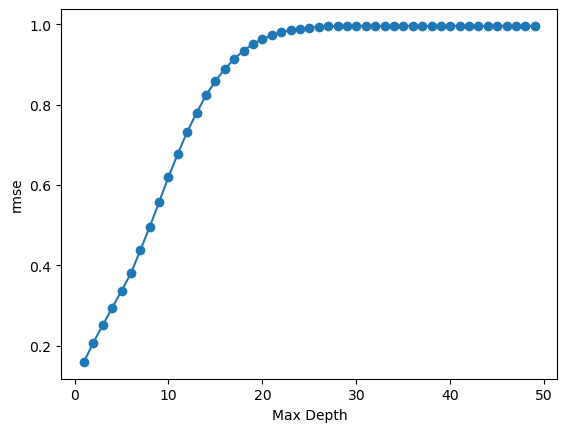

In [17]:
#definindo melhor max_depth

#TREINAMENTO
k = np.arange(1, 50, 1)
rmse_list =[]

for i in k:
    #MODEL
    model = tr.DecisionTreeRegressor(max_depth = i)    
    
    #FIT
    model.fit(x_training, y_training)
        
    #PERFORMANCE
    y_pred= model.predict(x_training)
        
    #METRICS
    
    #r2 = mt.r2_score(y_training, y_pred)
    #mse = mt.mean_squared_error(y_training, y_pred)
    rmse = np.sqrt(mt.r2_score(y_training, y_pred))
    rmse_list.append(rmse)
    #mae = mt.mean_absolute_error(y_training, y_pred)
    #mape = mt.mean_absolute_percentage_error(y_training, y_pred)
    
    #print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')
    print(f' rmse: {rmse} - max_depth:{i}')


plt.plot(k , rmse_list, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('rmse')

In [23]:
# TREINAMENTO

#MODEL
model = tr.DecisionTreeRegressor(random_state = 0, max_depth= 32)    
  
#FIT
model.fit(x_training, y_training)
     
#PERFORMANCE
y_pred= model.predict(x_training)
        
#METRICS
    
r2 = mt.r2_score(y_training, y_pred)
mse = mt.mean_squared_error(y_training, y_pred)
rmse = np.sqrt(mt.mean_squared_error(y_training, y_pred))
mae = mt.mean_absolute_error(y_training, y_pred)
mape = mt.mean_absolute_percentage_error(y_training, y_pred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')


 R2:0.992 , MSE:3.940, RMSE:1.985, MAE:0.214, MAPE:0.083


In [25]:
#TESTE

#MODEL
model = tr.DecisionTreeRegressor(random_state = 0, max_depth= 32)    
  
#FIT
model.fit(x_training, y_training)
     
#PERFORMANCE
y_pred_test= model.predict(x_test)
        
#METRICS
    
r2 = mt.r2_score(y_test, y_pred_test)
mse = mt.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, y_pred_test))
mae = mt.mean_absolute_error(y_test, y_pred_test)
mape = mt.mean_absolute_percentage_error(y_test, y_pred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:-0.221 , MSE:594.736, RMSE:24.387, MAE:16.850, MAPE:6.123


In [26]:
#VALIDATION

#MODEL
model = tr.DecisionTreeRegressor(random_state = 0, max_depth= 32)    
  
#FIT
model.fit(x_training, y_training)
     
#PERFORMANCE
y_pred_val= model.predict(x_validation)
        
#METRICS
    
r2 = mt.r2_score(y_validation,y_pred_val)
mse = mt.mean_squared_error(y_validation, y_pred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, y_pred_val))
mae = mt.mean_absolute_error(y_validation, y_pred_val)
mape = mt.mean_absolute_percentage_error(y_validation, y_pred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:-0.297 , MSE:619.382, RMSE:24.887376710539037, MAE:17.093, MAPE:7.106


### 2.3 Random Forest Regressor

In [27]:
#TREINAMENTO

#MODEL
model = en.RandomForestRegressor(random_state = 0)

#FIT
model.fit(x_training, y_training)

#PERFORMANCE
y_pred = model.predict(x_training)


#metrics
r2 = mt.r2_score(y_training, y_pred)
mse = mt.mean_squared_error(y_training, y_pred)
rmse = np.sqrt(mt.mean_squared_error(y_training, y_pred))
mae = mt.mean_absolute_error(y_training, y_pred)
mape = mt.mean_absolute_percentage_error(y_training, y_pred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.903 , MSE:46.455, RMSE:6.816, MAE:4.861, MAPE:2.578


In [29]:
#TESTE

#MODEL
model = en.RandomForestRegressor(random_state = 0)

#FIT
model.fit(x_training, y_training)

#PERFORMANCE
y_pred_test = model.predict(x_test)


#metrics
r2 = mt.r2_score(y_test, y_pred_test)
mse = mt.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, y_pred_test))
mae = mt.mean_absolute_error(y_test, y_pred_test)
mape = mt.mean_absolute_percentage_error(y_test, y_pred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.353 , MSE:314.935, RMSE:17.746, MAE:13.043, MAPE:6.528


In [30]:
#VALIDATION

#MODEL
model = en.RandomForestRegressor(random_state = 0)

#FIT
model.fit(x_training, y_training)

#PERFORMANCE
y_pred_val = model.predict(x_validation)


#metrics
r2 = mt.r2_score(y_validation, y_pred_val)
mse = mt.mean_squared_error(y_validation, y_pred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, y_pred_val))
mae = mt.mean_absolute_error(y_validation, y_pred_val)
mape = mt.mean_absolute_percentage_error(y_validation, y_pred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.335 , MSE:317.478, RMSE:17.818, MAE:13.002, MAPE:7.031


### 2.4 Polinomial Regression

In [ ]:
#selecionando valor de degrees
degree_range = np.arange(1, 15, 1)
rmse_values = []

for i in degree_range:
    #transformar as caracteristicas em caracteristicas polinomiais
    poly_features = pp.PolynomialFeatures(degree=i) 
    x_train_poly = poly_features.fit_transform(x_training)

    #ajustar um modelod e regressão linear
    poly_reg = lm.LinearRegression()
    poly_reg.fit(x_train_poly, y_training)

    #predict
    y_pred = poly_reg.predict(x_train_poly)

    #metrics
    rmse = np.sqrt(mt.mean_squared_error(y_training, y_pred))
    rmse_values.append(rmse)

    print(rmse)

#plotar valores
plt.plot(degree_range, rmse_values, marker='o', linestyle='-', color='b')
plt.title('rmse')
plt.xlabel('degree')
plt.ylabel('RMSE')


21.354065463644783
20.809951455286825
20.10469969094891
17.843124324654013
11.459058215353219


In [3]:
#TREINAMENTO
poly_features = pp.PolynomialFeatures(degree=2) 
x_train_poly = poly_features.fit_transform(x_training)

#MODEL
poly_reg = lm.LinearRegression()

#FIT
poly_reg.fit(x_train_poly, y_training)

#PERFORMANCE
y_pred = poly_reg.predict(x_train_poly)


#metrics
r2 = mt.r2_score(y_training, y_pred)
mse = mt.mean_squared_error(y_training, y_pred)
rmse = np.sqrt(mt.mean_squared_error(y_training, y_pred))
mae = mt.mean_absolute_error(y_training, y_pred)
mape = mt.mean_absolute_percentage_error(y_training, y_pred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.094 , MSE:433.054, RMSE:20.810, MAE:16.459, MAPE:8.351


In [9]:
## TESTE
poly_features = pp.PolynomialFeatures(degree=2) 
x_test_poly = poly_features.fit_transform(x_test)

#MODEL
poly_reg = lm.LinearRegression()

#FIT
poly_reg.fit(x_test_poly, y_test)

#PERFORMANCE
y_pred_test = poly_reg.predict(x_test_poly)


#metrics
r2 = mt.r2_score(y_test, y_pred_test)
mse = mt.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, y_pred_test))
mae = mt.mean_absolute_error(y_test, y_pred_test)
mape = mt.mean_absolute_percentage_error(y_test, y_pred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.124 , MSE:426.381, RMSE:20.649, MAE:16.412, MAPE:7.723


In [7]:
#VALIDATION
poly_features = pp.PolynomialFeatures(degree=2) 
x_val_poly = poly_features.fit_transform(x_validation)

#MODEL
poly_reg = lm.LinearRegression()

#FIT
poly_reg.fit(x_val_poly, y_validation)

#PERFORMANCE
y_pred_val = poly_reg.predict(x_val_poly)


#metrics
r2 = mt.r2_score(y_validation, y_pred_val)
mse = mt.mean_squared_error(y_validation, y_pred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, y_pred_val))
mae = mt.mean_absolute_error(y_validation, y_pred_val)
mape = mt.mean_absolute_percentage_error(y_validation, y_pred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.094 , MSE:432.806, RMSE:20.804, MAE:16.515, MAPE:8.415


### 2.5 Linear Regression Lasso

In [34]:
#TREINAMENTO

#MODEL
#lr = lm.LinearRegression()

#FIT
#lr.fit(x_training, y_training)

#PERFORMANCE
#y_pred_lr = lr.predict(x_training)

lasso = lm.Lasso()
lasso.fit(x_training, y_training)
ypred_lasso = lasso.predict(x_training)

#metrics
r2 = mt.r2_score(y_training, ypred_lasso)
mse = mt.mean_squared_error(y_training, ypred_lasso)
rmse = np.sqrt(mt.mean_squared_error(y_training, ypred_lasso))
mae = mt.mean_absolute_error(y_training, ypred_lasso)
mape = mt.mean_absolute_percentage_error(y_training, ypred_lasso)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')


 R2:0.007 , MSE:474.475, RMSE:21.782, MAE:17.305, MAPE:8.737


In [37]:
#TESTE

#MODEL
lr = lm.LinearRegression()

#FIT
lr.fit(x_training, y_training)

#PERFORMANCE
y_pred_lr = lr.predict(x_test)

lasso = lm.Lasso()
lasso.fit(x_training, y_training)
ypred_lasso_test = lasso.predict(x_test)

#metrics
r2 = mt.r2_score(y_test, ypred_lasso_test)
mse = mt.mean_squared_error(y_test, ypred_lasso_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, ypred_lasso_test))
mae = mt.mean_absolute_error(y_test, ypred_lasso_test)
mape = mt.mean_absolute_percentage_error(y_test, ypred_lasso_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')


 R2:0.008 , MSE:483.178, RMSE:21.981, MAE:17.473, MAPE:8.753


In [36]:
#VALIDATION

#MODEL
lr = lm.LinearRegression()

#FIT
lr.fit(x_training, y_training)

#PERFORMANCE
y_pred_lr = lr.predict(x_training)

lasso = lm.Lasso()
lasso.fit(x_training, y_training)
ypred_lasso_val = lasso.predict(x_validation)

#metrics
r2 = mt.r2_score(y_validation, ypred_lasso_val)
mse = mt.mean_squared_error(y_validation, ypred_lasso_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, ypred_lasso_val))
mae = mt.mean_absolute_error(y_validation, ypred_lasso_val)
mape = mt.mean_absolute_percentage_error(y_validation, ypred_lasso_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')


 R2:0.008 , MSE:473.747, RMSE:21.766, MAE:17.265, MAPE:8.696


### 2.6 Linear Regression Ridge

In [38]:
#TREINAMENTO

#MODEL
#lr = lm.LinearRegression()

#FIT
#lr.fit(x_training, y_training)

#PERFORMANCE
#y_pred = lr.predict(x_training)

ridge = lm.Ridge()

ridge.fit(x_training, y_training)

ypred = ridge.predict(x_training)

#metrics
r2 = mt.r2_score(y_training, ypred)
mse = mt.mean_squared_error(y_training, ypred)
rmse = np.sqrt(mt.mean_squared_error(y_training, ypred))
mae = mt.mean_absolute_error(y_training, ypred)
mape = mt.mean_absolute_percentage_error(y_training, ypred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')


 R2:0.046 , MSE:455.996, RMSE:21.354, MAE:16.998, MAPE:8.653


In [40]:
#TESTE

#MODEL
ridge = lm.Ridge()

#FIT
ridge.fit(x_training, y_training)

#PERFORMANCE
ypred_test = ridge.predict(x_test)

#metrics
r2 = mt.r2_score(y_test, ypred_test)
mse = mt.mean_squared_error(y_test, ypred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
mae = mt.mean_absolute_error(y_test, ypred_test)
mape = mt.mean_absolute_percentage_error(y_test, ypred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.052 , MSE:461.431, RMSE:21.481, MAE:17.130, MAPE:8.523


In [39]:
#VALIDATION

#MODEL
ridge = lm.Ridge()

#FIT
ridge.fit(x_training, y_training)

#PERFORMANCE
ypred_val = ridge.predict(x_validation)


#metrics
r2 = mt.r2_score(y_validation, ypred_val)
mse = mt.mean_squared_error(y_validation, ypred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, ypred_val))
mae = mt.mean_absolute_error(y_validation, ypred_val)
mape = mt.mean_absolute_percentage_error(y_validation, ypred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.040 , MSE:458.445, RMSE:21.411, MAE:17.039, MAPE:8.682


### 2.7 Linear Regression Elastic Net

In [41]:
#TREINAMENTO

#MODEL
ransac = lm.ElasticNet(random_state = 0)

#FIT
ransac.fit(x_training, y_training)

#PERFORMANCE
ypred = ransac.predict(x_training)


#metrics
r2 = mt.r2_score(y_training, ypred)
mse = mt.mean_squared_error(y_training, ypred)
rmse = np.sqrt(mt.mean_squared_error(y_training, ypred))
mae = mt.mean_absolute_error(y_training, ypred)
mape = mt.mean_absolute_percentage_error(y_training, ypred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.008 , MSE:474.269, RMSE:21.778, MAE:17.300, MAPE:8.732


In [42]:
#TESTE

#MODEL
ransac = lm.ElasticNet(random_state = 0)

#FIT
ransac.fit(x_training, y_training)

#PERFORMANCE
ypred_test = ransac.predict(x_test)

#metrics
r2 = mt.r2_score(y_test, ypred_test)
mse = mt.mean_squared_error(y_test, ypred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
mae = mt.mean_absolute_error(y_test, ypred_test)
mape = mt.mean_absolute_percentage_error(y_test, ypred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.008 , MSE:483.035, RMSE:21.978, MAE:17.470, MAPE:8.745


In [43]:
#VALIDATION

#MODEL
ransac = lm.ElasticNet(random_state = 0)

#FIT
ransac.fit(x_training, y_training)

#PERFORMANCE
ypred_val = ransac.predict(x_validation)

#metrics
r2 = mt.r2_score(y_validation, ypred_val)
mse = mt.mean_squared_error(y_validation, ypred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, ypred_val))
mae = mt.mean_absolute_error(y_validation, ypred_val)
mape = mt.mean_absolute_percentage_error(y_validation, ypred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.008 , MSE:473.636, RMSE:21.763, MAE:17.263, MAPE:8.694


### 2.8 Polinomial Regression Lasso

In [44]:
#TREINAMENTO
poly_features = pp.PolynomialFeatures()
x_train_poly = poly_features.fit_transform(x_training)

#MODEL
poly_reg = lm.Lasso()

#FIT
poly_reg.fit(x_train_poly, y_training)

#PERFORMANCE
ypred = poly_reg.predict(x_train_poly)


#metrics
r2 = mt.r2_score(y_training, ypred)
mse = mt.mean_squared_error(y_training, ypred)
rmse = np.sqrt(mt.mean_squared_error(y_training, ypred))
mae = mt.mean_absolute_error(y_training, ypred)
mape = mt.mean_absolute_percentage_error(y_training, ypred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.009 , MSE:473.639, RMSE:21.763, MAE:17.285, MAPE:8.700


In [45]:
#TESTE
poly_features = pp.PolynomialFeatures()
x_test_poly = poly_features.fit_transform(x_test)

#MODEL
poly_reg = lm.Lasso()

#FIT
poly_reg.fit(x_test_poly, y_test)

#PERFORMANCE
ypred_test = poly_reg.predict(x_test_poly)


#metrics
r2 = mt.r2_score(y_test, ypred_test)
mse = mt.mean_squared_error(y_test, ypred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
mae = mt.mean_absolute_error(y_test, ypred_test)
mape = mt.mean_absolute_percentage_error(y_test, ypred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.010 , MSE:482.189, RMSE:21.959, MAE:17.474, MAPE:8.722


In [46]:
#VALIDATION
poly_features = pp.PolynomialFeatures()
x_val_poly = poly_features.fit_transform(x_validation)

#MODEL
poly_reg = lm.Lasso()

#FIT
poly_reg.fit(x_val_poly, y_validation)

#PERFORMANCE
ypred_val = poly_reg.predict(x_val_poly)


#metrics
r2 = mt.r2_score(y_validation, ypred_val)
mse = mt.mean_squared_error(y_validation, ypred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, ypred_val))
mae = mt.mean_absolute_error(y_validation, ypred_val)
mape = mt.mean_absolute_percentage_error(y_validation, ypred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.010 , MSE:472.907, RMSE:21.746, MAE:17.245, MAPE:8.683


### 2.9 Polinomial Regression Ridge

In [47]:
#TREINAMENTO
poly_features = pp.PolynomialFeatures()
x_train_poly = poly_features.fit_transform(x_training)

#MODEL
poly_reg = lm.Ridge()

#FIT
poly_reg.fit(x_train_poly, y_training)

#PERFORMANCE
ypred = poly_reg.predict(x_train_poly)


#metrics
r2 = mt.r2_score(y_training, ypred)
mse = mt.mean_squared_error(y_training, ypred)
rmse = np.sqrt(mt.mean_squared_error(y_training, ypred))
mae = mt.mean_absolute_error(y_training, ypred)
mape = mt.mean_absolute_percentage_error(y_training, ypred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.093 , MSE:433.475, RMSE:20.820, MAE:16.472, MAPE:8.373


In [48]:
#TESTE
poly_features = pp.PolynomialFeatures()
x_test_poly = poly_features.fit_transform(x_test)

#MODEL
poly_reg = lm.Ridge()

#FIT
poly_reg.fit(x_test_poly, y_test)

#PERFORMANCE
ypred_test = poly_reg.predict(x_test_poly)


#metrics
r2 = mt.r2_score(y_test, ypred_test)
mse = mt.mean_squared_error(y_test, ypred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
mae = mt.mean_absolute_error(y_test, ypred_test)
mape = mt.mean_absolute_percentage_error(y_test, ypred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.118 , MSE:429.595, RMSE:20.727, MAE:16.494, MAPE:7.898


In [49]:
#VALIDATION
poly_features = pp.PolynomialFeatures()
x_val_poly = poly_features.fit_transform(x_validation)

#MODEL
poly_reg = lm.Ridge()

#FIT
poly_reg.fit(x_val_poly, y_validation)

#PERFORMANCE
ypred_val = poly_reg.predict(x_val_poly)


#metrics
r2 = mt.r2_score(y_validation, ypred_val)
mse = mt.mean_squared_error(y_validation, ypred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, ypred_val))
mae = mt.mean_absolute_error(y_validation, ypred_val)
mape = mt.mean_absolute_percentage_error(y_validation, ypred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')


 R2:0.092 , MSE:433.767, RMSE:20.827, MAE:16.538, MAPE:8.445


### 2.10 Polinomial Regression Elastic Net 

In [50]:
#TREINAMENTO
poly_features = pp.PolynomialFeatures()
x_train_poly = poly_features.fit_transform(x_training)

#MODEL
poly_reg = lm.ElasticNet(random_state = 0)

#FIT
poly_reg.fit(x_train_poly, y_training)

#PERFORMANCE
ypred = poly_reg.predict(x_train_poly)


#metrics
r2 = mt.r2_score(y_training, ypred)
mse = mt.mean_squared_error(y_training, ypred)
rmse = np.sqrt(mt.mean_squared_error(y_training, ypred))
mae = mt.mean_absolute_error(y_training, ypred)
mape = mt.mean_absolute_percentage_error(y_training, ypred)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.013 , MSE:471.878, RMSE:21.723, MAE:17.244, MAPE:8.679


In [51]:
#TESTE
poly_features = pp.PolynomialFeatures()
x_test_poly = poly_features.fit_transform(x_test)

#MODEL
poly_reg = lm.ElasticNet(random_state = 0)

#FIT
poly_reg.fit(x_test_poly, y_test)

#PERFORMANCE
ypred_test = poly_reg.predict(x_test_poly)


#metrics
r2 = mt.r2_score(y_test, ypred_test)
mse = mt.mean_squared_error(y_test, ypred_test)
rmse = np.sqrt(mt.mean_squared_error(y_test, ypred_test))
mae = mt.mean_absolute_error(y_test, ypred_test)
mape = mt.mean_absolute_percentage_error(y_test, ypred_test)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')

 R2:0.013 , MSE:480.572, RMSE:21.922, MAE:17.441, MAPE:8.717


In [52]:
#VALIDATION
poly_features = pp.PolynomialFeatures()
x_val_poly = poly_features.fit_transform(x_validation)

#MODEL
poly_reg = lm.ElasticNet(random_state = 0)

#FIT
poly_reg.fit(x_val_poly, y_validation)

#PERFORMANCE
ypred_val = poly_reg.predict(x_val_poly)


#metrics
r2 = mt.r2_score(y_validation, ypred_val)
mse = mt.mean_squared_error(y_validation, ypred_val)
rmse = np.sqrt(mt.mean_squared_error(y_validation, ypred_val))
mae = mt.mean_absolute_error(y_validation, ypred_val)
mape = mt.mean_absolute_percentage_error(y_validation, ypred_val)
    
print(f' R2:{r2:.3f} , MSE:{mse:.3f}, RMSE:{rmse:.3f}, MAE:{mae:.3f}, MAPE:{mape:.3f}')


 R2:0.013 , MSE:471.379, RMSE:21.711, MAE:17.203, MAPE:8.681
